In [6]:
import cv2
import numpy as np
from insightface.app import FaceAnalysis

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Init model
app = FaceAnalysis(name="buffalo_l")
app.prepare(ctx_id=-1, det_size=(640,640))

# Load two different images
img1 = cv2.imread(r"WhatsApp Image 2025-09-07 at 14.59.31_1b2262b2.jpg")
img2 = cv2.imread(r"WhatsApp Image 2025-09-07 at 14.59.50_e2b82c32.jpg")

# Detect and get embeddings
faces1 = app.get(img1)
faces2 = app.get(img2)

if len(faces1) > 0 and len(faces2) > 0:
    emb1 = faces1[0].embedding
    emb2 = faces2[0].embedding
    
    sim = cosine_similarity(emb1, emb2)
    print("Cosine similarity:", sim)
    
    if sim > 0.6:  # threshold, can tune
        print("Same person ✅")
    else:
        print("Different persons ❌")
else:
    print("No face detected in one of the images")


Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CUDAExecutionProvider': {'device_id': '0', 'has_user_compute_stream': '0', 'cudnn_conv1d_pad_to_nc1d': '0', 'user_compute_stream': '0', 'gpu_external_alloc': '0', 'gpu_mem_limit': '18446744073709551615', 'enable_cuda_graph': '0', 'gpu_external_free': '0', 'gpu_external_empty_cache': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'do_copy_in_default_stream': '1', 'cudnn_conv_use_max_workspace': '1', 'tunable_op_enable': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'prefer_nhwc': '0', 'use_ep_level_unified_stream': '0', 'use_tf32': '1', 'sdpa_kernel': '0'}, 'CPUExecutionProvider': {}}
find model: C:\Users\Ankit/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CUDA

Stopped by user


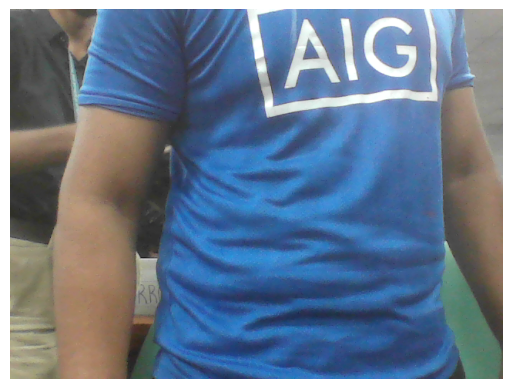

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from insightface.app import FaceAnalysis

# -----------------------------
# Utility functions
# -----------------------------
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def get_embedding(app, img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error loading {img_path}")
        return None
    faces = app.get(img)
    if len(faces) == 0:
        print(f"No face detected in {img_path}")
        return None
    return faces[0].embedding

# -----------------------------
# Init model
# -----------------------------
app = FaceAnalysis(name="buffalo_l")
app.prepare(ctx_id=-1, det_size=(640, 640))

# -----------------------------
# Load reference persons
# -----------------------------
known_embeddings = {}
known_embeddings["ankit"] = get_embedding(app, r"WhatsApp Image 2025-09-07 at 04.52.07_9414d159.jpg")
known_embeddings["shabri"] = get_embedding(app, r"WhatsApp Image 2025-09-07 at 14.59.50_f8f6ce70.jpg")
known_embeddings["kironmoy"] = get_embedding(app, r"WhatsApp Image 2025-09-07 at 04.48.49_435ebecc.jpg")

known_embeddings = {k:v for k,v in known_embeddings.items() if v is not None}
print("Loaded embeddings for:", list(known_embeddings.keys()))

# -----------------------------
# Webcam Recognition (Jupyter)
# -----------------------------
cap = cv2.VideoCapture(0)
threshold = 0.6

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        faces = app.get(frame)

        for face in faces:
            emb = face.embedding
            best_match = "Unknown"
            best_score = -1

            for name, ref_emb in known_embeddings.items():
                sim = cosine_similarity(emb, ref_emb)
                if sim > best_score:
                    best_score = sim
                    best_match = name

            if best_score < threshold:
                best_match = "Unknown"

            # Draw box + label
            x1, y1, x2, y2 = face.bbox.astype(int)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"{best_match}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

        # Convert BGR → RGB for display in Jupyter
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        clear_output(wait=True)
        plt.imshow(frame_rgb)
        plt.axis("off")
        display(plt.gcf())

except KeyboardInterrupt:
    print("Stopped by user")




Stopped by user


error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


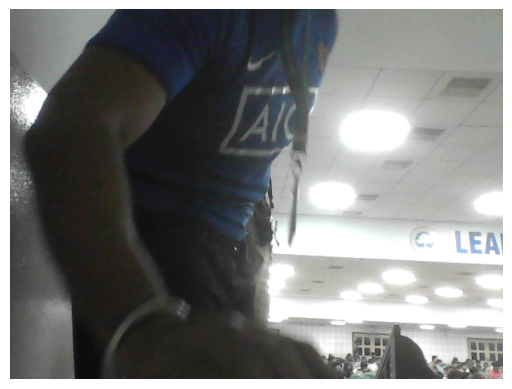

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from insightface.app import FaceAnalysis

# -----------------------------
# Utility functions
# -----------------------------
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def get_embedding(app, img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error loading {img_path}")
        return None
    faces = app.get(img)
    if len(faces) == 0:
        print(f"No face detected in {img_path}")
        return None
    return faces[0].embedding

# -----------------------------
# Init model (GPU enabled)
# -----------------------------
app = FaceAnalysis(name="buffalo_l")
app.prepare(ctx_id=0, det_size=(640, 640))  # 0 = GPU, -1 = CPU

# -----------------------------
# Load reference persons
# -----------------------------
known_embeddings = {}
known_embeddings["ankit"] = get_embedding(app, r"WhatsApp Image 2025-09-07 at 04.52.07_9414d159.jpg")
known_embeddings["shabri"] = get_embedding(app, r"WhatsApp Image 2025-09-07 at 14.59.50_f8f6ce70.jpg")
known_embeddings["kironmoy"] = get_embedding(app, r"WhatsApp Image 2025-09-07 at 04.48.49_435ebecc.jpg")

# Remove failed loads
known_embeddings = {k: v for k, v in known_embeddings.items() if v is not None}
print("Loaded embeddings for:", list(known_embeddings.keys()))

# -----------------------------
# Webcam Recognition (Jupyter)
# -----------------------------
cap = cv2.VideoCapture(0)
threshold = 0.6

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        faces = app.get(frame)

        for face in faces:
            emb = face.embedding
            best_match = "Unknown"
            best_score = -1

            for name, ref_emb in known_embeddings.items():
                sim = cosine_similarity(emb, ref_emb)
                if sim > best_score:
                    best_score = sim
                    best_match = name

            if best_score < threshold:
                best_match = "Unknown"

            # Draw box + label
            x1, y1, x2, y2 = face.bbox.astype(int)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"{best_match}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

        # Convert BGR → RGB for Jupyter display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        clear_output(wait=True)
        plt.imshow(frame_rgb)
        plt.axis("off")
        display(plt.gcf())

except KeyboardInterrupt:
    print("Stopped by user")

cap.release()
cv2.destroyAllWindows()
